In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('./../data/03_BA_real_reviews.csv')
df.head()

,Unnamed: 0,title,rating,review_date,review,trip_verified,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,recommend,wifi service,rating bin
0,0,"""Will honestly never fly them again if I can h...",4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,True,NaN,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),Nov-22,3.0,2.0,NaN,4.0,2,False,NaN,neutral
1,1,"""Very unprofessional for a renowned airline li...",1,19/11/2022,This is the worst experience I have ever had w...,True,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,Aug-22,1.0,1.0,1.0,1.0,1,False,1.0,negative
2,2,"""lounge was overcrowded and worn out""",2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,True,Boeing 777,Solo Leisure,Business Class,London to Cape Town,Nov-22,4.0,2.0,4.0,1.0,1,False,NaN,negative
3,3,"""very uncomfortable trip""",1,07/11/2022,Not Verified | Worst experience ever. Outbound...,False,NaN,Solo Leisure,Economy Class,Milan to Dallas via London,Nov-22,2.0,5.0,2.0,2.0,1,False,2.0,negative
4,4,"""rate this just as a mediocre journey""",5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",True,Boeing 787-8,Solo Leisure,Economy Class,Baltimore to London Heathrow,Nov-22,1.0,3.0,1.0,2.0,3,True,NaN,neutral


### Checking data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1200 non-null   int64  
 1   title                1200 non-null   object 
 2   rating               1200 non-null   int64  
 3   review_date          1200 non-null   object 
 4   review               1200 non-null   object 
 5   trip_verified        1200 non-null   bool   
 6   aircraft             720 non-null    object 
 7   type_of_traveller    1199 non-null   object 
 8   seat_type            1200 non-null   object 
 9   route                1198 non-null   object 
 10  date_flown           1200 non-null   object 
 11  seat_comfort         1124 non-null   float64
 12  cabin_staff_service  1117 non-null   float64
 13  food_and_beverages   670 non-null    float64
 14  ground_service       1147 non-null   float64
 15  value_for_money      1200 non-null   i

In [6]:
df['rating'].unique()

array([ 4,  1,  2,  5,  6,  9,  3,  8,  7, 10], dtype=int64)

In [7]:
df['review_date'].unique()

array(['19/11/2022', '18/11/2022', '07/11/2022', '05/11/2022',
       '31/10/2022', '30/10/2022', '25/10/2022', '24/10/2022',
       '23/10/2022', '22/10/2022', '21/10/2022', '17/10/2022',
       '16/10/2022', '15/10/2022', '14/10/2022', '06/10/2022',
       '01/10/2022', '25/09/2022', '24/09/2022', '23/09/2022',
       '20/09/2022', '16/09/2022', '14/09/2022', '11/09/2022',
       '10/09/2022', '07/09/2022', '06/09/2022', '31/08/2022',
       '28/08/2022', '23/08/2022', '22/08/2022', '21/08/2022',
       '20/08/2022', '15/08/2022', '10/08/2022', '04/08/2022',
       '31/07/2022', '30/07/2022', '27/07/2022', '23/07/2022',
       '22/07/2022', '20/07/2022', '18/07/2022', '17/07/2022',
       '13/07/2022', '12/07/2022', '09/07/2022', '07/07/2022',
       '06/07/2022', '04/07/2022', '30/06/2022', '29/06/2022',
       '28/06/2022', '27/06/2022', '25/06/2022', '24/06/2022',
       '23/06/2022', '22/06/2022', '20/06/2022', '19/06/2022',
       '18/06/2022', '17/06/2022', '16/06/2022', '15/06

In [10]:
mapping = {False: 'NO', True: 'YES'}
df['recommend'] = df['recommend'].replace(mapping)

In [33]:
null_counts = df.isnull().sum()
null_counts

Unnamed: 0               0
rating                   0
review_date              0
review                   0
aircraft               480
seat_type                0
seat_comfort            76
cabin_staff_service     83
food_and_beverages     530
ground_service          53
value_for_money          0
recommend                0
wifi service           913
rating bin               0
dtype: int64

In [34]:
df.rename(columns={'wifi_and_connectivity': 'wifi service'}, inplace=True)
df.head(1)

,Unnamed: 0,rating,review_date,review,aircraft,seat_type,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,recommend,wifi service,rating bin
0,0,4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,NaN,Premium Economy,3.0,2.0,NaN,4.0,2,NO,NaN,neutral


### Filter wi-fi

In [35]:
description = df.describe().round(1)
description

,Unnamed: 0,rating,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi service
count,1200.0,1200.0,1124.0,1117.0,670.0,1147.0,1200.0,287.0
mean,599.5,4.4,2.8,3.2,2.7,2.8,2.5,2.1
std,346.6,3.2,1.4,1.5,1.4,1.5,1.5,1.5
min,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,299.8,1.0,1.0,2.0,1.0,1.0,1.0,1.0
50%,599.5,3.0,3.0,3.0,3.0,3.0,2.0,1.0
75%,899.2,8.0,4.0,5.0,4.0,4.0,4.0,3.0
max,1199.0,10.0,5.0,5.0,5.0,5.0,5.0,5.0


In [36]:
df['rating'].unique()

array([ 4,  1,  2,  5,  6,  9,  3,  8,  7, 10], dtype=int64)

### Making rating bin

In [37]:
def map_rating_to_bin(rating):
    if rating >= 1 and rating <= 3:
        return 'negative'
    elif rating >= 4 and rating <= 7:
        return 'neutral'
    elif rating >= 8 and rating <= 10:
        return 'positive'
    else:
        return 'unknown'

In [38]:
df['rating bin'] = df['rating'].apply(map_rating_to_bin)
df.head()

,Unnamed: 0,rating,review_date,review,aircraft,seat_type,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,recommend,wifi service,rating bin
0,0,4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,NaN,Premium Economy,3.0,2.0,NaN,4.0,2,NO,NaN,neutral
1,1,1,19/11/2022,This is the worst experience I have ever had w...,NaN,Economy Class,1.0,1.0,1.0,1.0,1,NO,1.0,negative
2,2,2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,Boeing 777,Business Class,4.0,2.0,4.0,1.0,1,NO,NaN,negative
3,3,1,07/11/2022,Not Verified | Worst experience ever. Outbound...,NaN,Economy Class,2.0,5.0,2.0,2.0,1,NO,2.0,negative
4,4,5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",Boeing 787-8,Economy Class,1.0,3.0,1.0,2.0,3,YES,NaN,neutral


### Checking key words

In [11]:
from collections import Counter
import re

In [12]:
common_words = ['and', 'but', 'it', 'I', 'me', 'the', 'a', 'to', 'was', 'i', 'in', 'of', 'on', 'for', 'with', 'is', 'were',
               'that', 'my', 'at', 'we', 'this', 'they', 'had', 'as', 'have', 'from', 'be', 't', 'very', 'so', 'are', 'an',
               'which', 'there', 'by', 'or', 'you', 'all', 'when', 'ba', 'british', 'airways', 'flight', 'our', 'one', 
               'would', 'their', 'after', 's', 'out']

In [13]:
word_counter = Counter()

for review in df['review']:
    words = re.findall(r'\w+', review.lower())  # Convert to lowercase and split into words
    filtered_words = [word for word in words if word not in common_words]
    word_counter.update(filtered_words)

In [14]:
most_common_words = word_counter.most_common(n=15)
print("Most frequently used words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most frequently used words:
not: 1520
no: 954
service: 910
london: 897
seat: 673
food: 659
crew: 628
time: 610
class: 568
cabin: 568
good: 559
seats: 544
staff: 500
business: 485
heathrow: 435


In [15]:
target_phrase = 'good service'
occurrences = 0

for review in df['review']:
    if target_phrase in review:
        occurrences += 1

In [16]:
print(f"The phrase '{target_phrase}' appears {occurrences} times in the 'review' column.")

The phrase 'good service' appears 11 times in the 'review' column.


In [17]:
target_phrase = 'bad'
occurrences = 0

for review in df['review']:
    if target_phrase in review:
        occurrences += 1
print(f"The phrase '{target_phrase}' appears {occurrences} times in the 'review' column.")

The phrase 'bad' appears 126 times in the 'review' column.


In [18]:
target_phrase = 'never again'
occurrences = 0

for review in df['review']:
    if target_phrase in review:
        occurrences += 1
print(f"The phrase '{target_phrase}' appears {occurrences} times in the 'review' column.")

The phrase 'never again' appears 12 times in the 'review' column.


In [19]:
target_phrase = 'lost baggage'
occurrences = 0

for review in df['review']:
    if target_phrase in review:
        occurrences += 1
print(f"The phrase '{target_phrase}' appears {occurrences} times in the 'review' column.")

The phrase 'lost baggage' appears 5 times in the 'review' column.


In [20]:
target_phrase = 'horrible'
occurrences = 0

for review in df['review']:
    if target_phrase in review:
        occurrences += 1
print(f"The phrase '{target_phrase}' appears {occurrences} times in the 'review' column.")

The phrase 'horrible' appears 21 times in the 'review' column.


In [46]:
negative = df[df['rating bin'] == 'negative']

In [47]:
common_words = ['and', 'but', 'it', 'I', 'me', 'the', 'a', 'to', 'was', 'i', 'in', 'of', 'on', 'for', 'with', 'is', 'were',
               'that', 'my', 'at', 'we', 'this', 'they', 'had', 'as', 'have', 'from', 'be', 't', 'very', 'so', 'are', 'an',
               'which', 'there', 'by', 'or', 'you', 'all', 'when', 'ba', 'british', 'airways', 'flight', 'our', 'one', 
               'would', 'their', 'after', 's', 'out', 'get', 'not', 'no', 'london', 'us', 'them']

In [48]:
word_counter = Counter()

for review in negative['review']:
    words = re.findall(r'\w+', review.lower()) 
    filtered_words = [word for word in words if word not in common_words]
    word_counter.update(filtered_words)

In [49]:
most_common_words = word_counter.most_common(n=15)
print("Most frequently used words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most frequently used words:
service: 464
seat: 345
class: 316
seats: 292
business: 285
staff: 280
hours: 265
time: 264
food: 259
airline: 253
told: 243
only: 241
been: 239
customer: 234
if: 224


In [50]:
positive = df[df['rating bin'] == 'positive']

In [51]:
word_counter = Counter()

for review in positive['review']:
    words = re.findall(r'\w+', review.lower())  
    filtered_words = [word for word in words if word not in common_words]
    word_counter.update(filtered_words)

In [52]:
most_common_words = word_counter.most_common(n=15)
print("Most frequently used words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most frequently used words:
good: 277
crew: 238
service: 233
food: 197
time: 173
cabin: 164
heathrow: 131
seat: 114
well: 110
seats: 109
staff: 109
club: 106
class: 104
check: 104
great: 102


### Calculating 'reccomended'

In [25]:
df.head()

,Unnamed: 0,rating,review_date,review,aircraft,seat_type,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,recommend,wifi service,rating bin
0,0,4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,NaN,Premium Economy,3.0,2.0,NaN,4.0,2,NO,NaN,neutral
1,1,1,19/11/2022,This is the worst experience I have ever had w...,NaN,Economy Class,1.0,1.0,1.0,1.0,1,NO,1.0,negative
2,2,2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,Boeing 777,Business Class,4.0,2.0,4.0,1.0,1,NO,NaN,negative
3,3,1,07/11/2022,Not Verified | Worst experience ever. Outbound...,NaN,Economy Class,2.0,5.0,2.0,2.0,1,NO,2.0,negative
4,4,5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",Boeing 787-8,Economy Class,1.0,3.0,1.0,2.0,3,YES,NaN,neutral


In [26]:
total_reviews = df.shape[0]

recommended_count = df[df['recommend'] == 'YES'].shape[0]
not_recommended_count = df[df['recommend'] == 'NO'].shape[0]

recommended_percentage = (recommended_count / total_reviews) * 100
not_recommended_percentage = (not_recommended_count / total_reviews) * 100

print(f"Number of Recommended Reviews: {recommended_count} ({recommended_percentage:.2f}%)")
print(f"Number of Not Recommended Reviews: {not_recommended_count} ({not_recommended_percentage:.2f}%)")

Number of Recommended Reviews: 428 (35.67%)
Number of Not Recommended Reviews: 772 (64.33%)


### Ckecking service ratings

In [53]:
selected_columns = ['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'ground_service', 'value_for_money', 'wifi service']
selected_df = df[selected_columns]

average_values = selected_df.mean()
average_df = pd.DataFrame(average_values, columns=['average'])

In [54]:
average_df

,average
seat_comfort,2.782028
cabin_staff_service,3.179946
food_and_beverages,2.716418
ground_service,2.782040
value_for_money,2.530833
wifi service,2.149826


In [55]:
df.describe()

,rating,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi service
count,1200.000000,1124.000000,1117.000000,670.000000,1147.000000,1200.000000,287.000000
mean,4.397500,2.782028,3.179946,2.716418,2.782040,2.530833,2.149826
std,3.238554,1.377079,1.526595,1.425855,1.486856,1.468848,1.482482
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [58]:
top_raited = df[df['rating'].isin([9, 10])]
top_raited.head()

,rating,review_date,review,aircraft,seat_type,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,recommend,wifi service,rating bin
10,9,30/10/2022,A great flight. The suites on this aircraft re...,A350-1000,Business Class,5.0,4.0,5.0,3.0,5,YES,5.0,positive
11,9,30/10/2022,I am happy to say that this flight was quite g...,A320,Business Class,3.0,5.0,NaN,4.0,5,YES,5.0,positive
13,9,24/10/2022,A very positive experience with BA. Seats were...,Boeing 787-10,Business Class,5.0,4.0,5.0,5.0,4,YES,5.0,positive
20,9,17/10/2022,I flew with hand baggage but security at Dubai...,A380,Business Class,4.0,4.0,2.0,4.0,3,YES,2.0,positive
22,10,15/10/2022,"This review is specifically about Maddie, crew...",Boeing 777,Business Class,5.0,5.0,5.0,5.0,4,YES,4.0,positive


In [59]:
average_df

,average
seat_comfort,2.782028
cabin_staff_service,3.179946
food_and_beverages,2.716418
ground_service,2.782040
value_for_money,2.530833
wifi service,2.149826


### Reviews according to aircraft

In [27]:
high_rating_df = df[df['rating'] >= 7]
low_rating_df = df[df['rating'] <= 4]

top_high_rating_aircraft = high_rating_df['aircraft'].value_counts().head(5)
top_low_rating_aircraft = low_rating_df['aircraft'].value_counts().head(5)

print("Top 5 Aircraft for Ratings >= 7:")
print(top_high_rating_aircraft)

print("\nTop 5 Aircraft for Ratings <= 4:")
print(top_low_rating_aircraft)

Top 5 Aircraft for Ratings >= 7:
aircraft
A320              54
A380              32
Boeing 777        27
Boeing 777-200    21
A319              18
Name: count, dtype: int64

Top 5 Aircraft for Ratings <= 4:
aircraft
A320              69
Boeing 777        50
Boeing 747-400    30
A380              25
Boeing 747        21
Name: count, dtype: int64


### Calculating reviews accordinf to seat type

In [28]:
seat_type_review_counts = df.groupby('seat_type')['review'].count()
seat_type_review_counts

seat_type
Business Class     394
Economy Class      651
First Class         53
Premium Economy    102
Name: review, dtype: int64

In [29]:
for seat_type, count in seat_type_review_counts.items():
    print(f"Seat Type: {seat_type}, Number of Reviews: {count}")

Seat Type: Business Class, Number of Reviews: 394
Seat Type: Economy Class, Number of Reviews: 651
Seat Type: First Class, Number of Reviews: 53
Seat Type: Premium Economy, Number of Reviews: 102


In [30]:
seat_type_recommend_counts = df.groupby('seat_type')['recommend'].value_counts()
seat_type_recommend_counts

seat_type        recommend
Business Class   NO           231
                 YES          163
Economy Class    NO           447
                 YES          204
First Class      NO            29
                 YES           24
Premium Economy  NO            65
                 YES           37
Name: count, dtype: int64

In [61]:
average_df2 = df.groupby('seat_type')[['cabin_staff_service', 'food_and_beverages', 'ground_service', 'value_for_money', 'wifi service', 'rating']].mean()
average_df.reset_index(inplace=True)

In [62]:
average_df2

,cabin_staff_service,food_and_beverages,ground_service,value_for_money,wifi service,rating
seat_type,,,,,,
Business Class,3.313158,2.737327,2.937173,2.644670,2.365385,4.868020
Economy Class,3.056027,2.616822,2.618506,2.416283,1.947761,3.989247
First Class,3.692308,2.914894,3.211538,2.981132,1.882353,5.679245
Premium Economy,3.135417,2.929412,2.979381,2.588235,2.437500,4.519608


In [63]:
#average_df2.to_csv('05_BA_avg_rate_by_seat.csv')

### Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

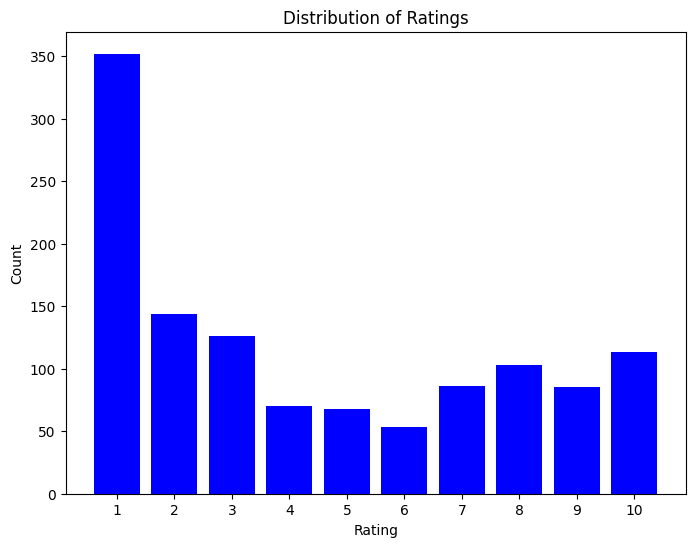

In [9]:
rating_counts = df['rating'].value_counts()

rating_counts = rating_counts.sort_index()

plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color='blue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.show()

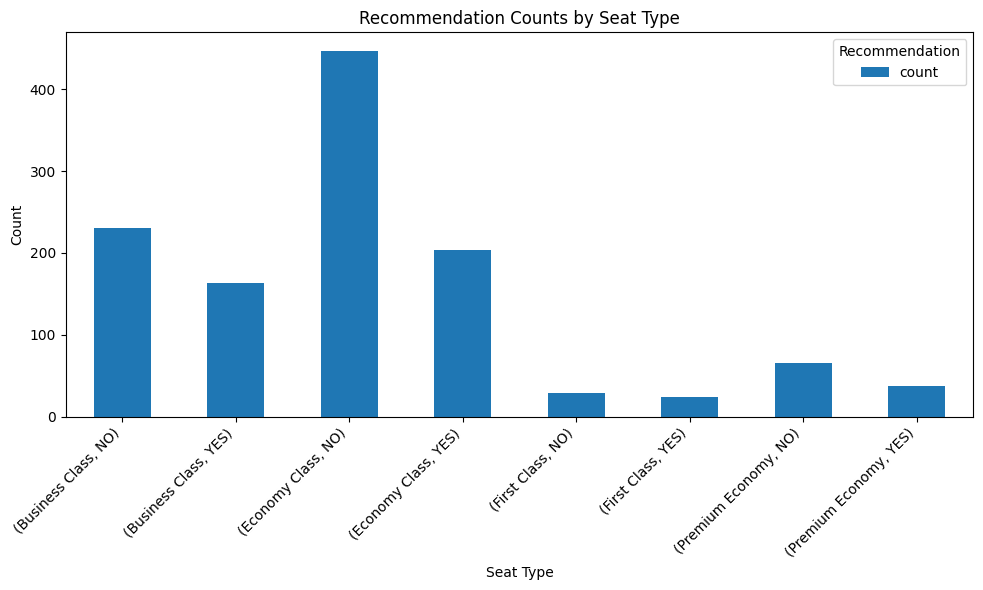

In [31]:
ax = seat_type_recommend_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.title('Recommendation Counts by Seat Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Recommendation')
plt.tight_layout()
plt.show()

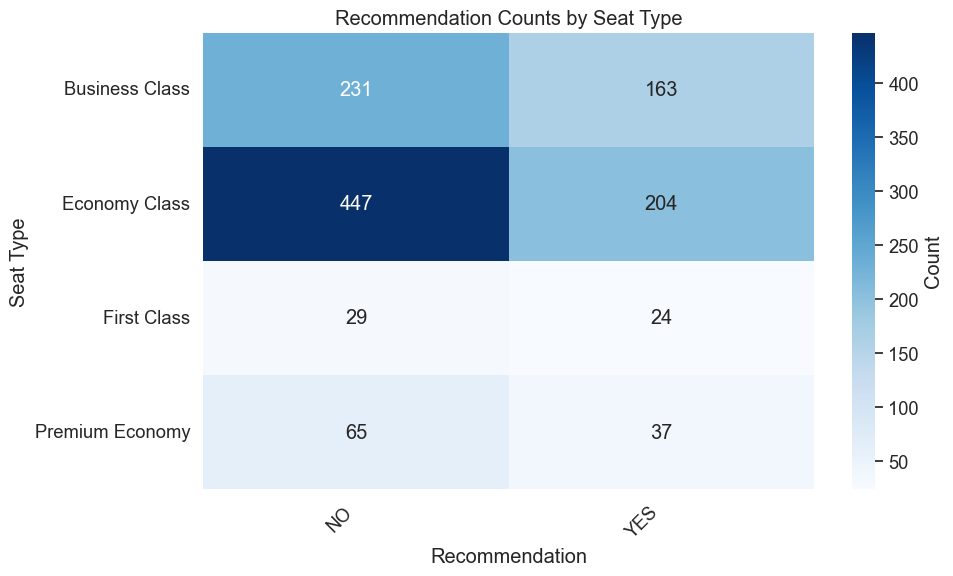

In [32]:
seat_type_recommend_counts = df.groupby(['seat_type', 'recommend']).size().unstack()

plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  
sns.heatmap(seat_type_recommend_counts, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.xlabel('Recommendation')
plt.ylabel('Seat Type')
plt.title('Recommendation Counts by Seat Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

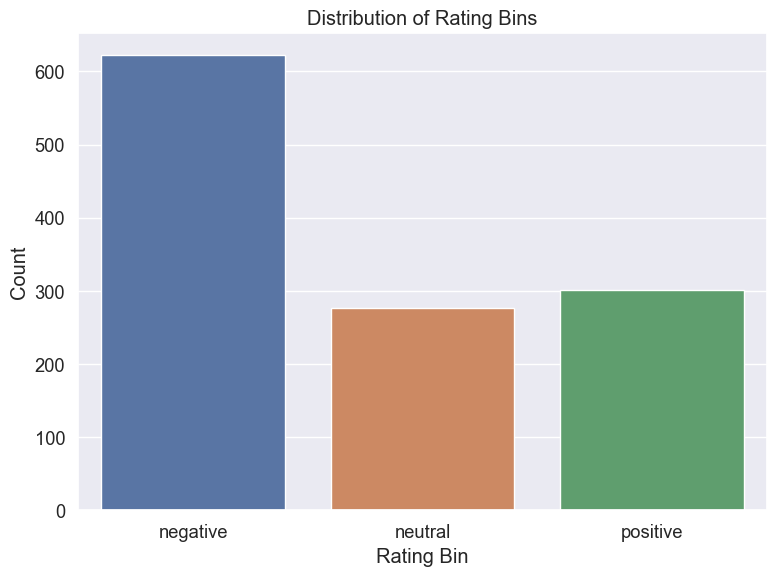

In [39]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='rating bin', order=['negative', 'neutral', 'positive'])


plt.xlabel('Rating Bin')
plt.ylabel('Count')
plt.title('Distribution of Rating Bins')
plt.tight_layout()
plt.show()

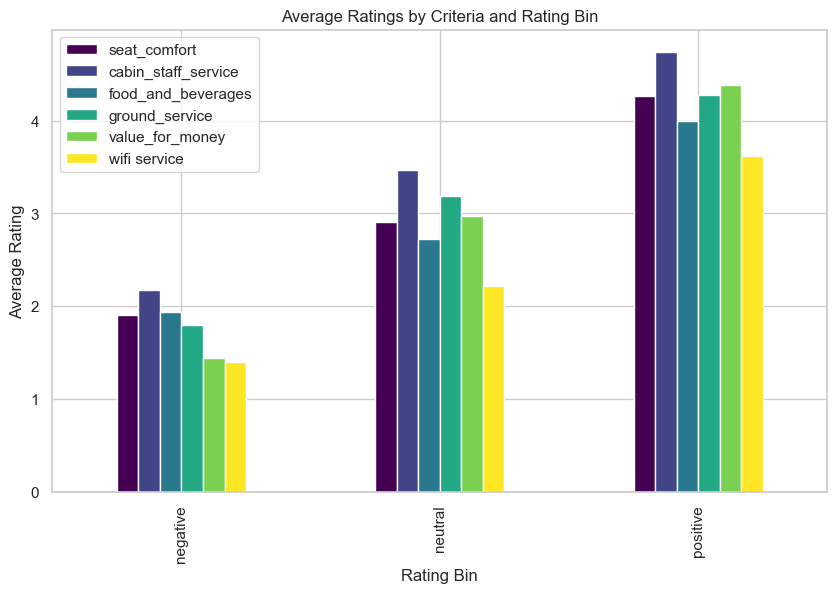

In [60]:
average_df = df.groupby('rating bin')[['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'ground_service', 'value_for_money', 'wifi service']].mean()

sns.set(style="whitegrid")
ax = average_df.plot(kind='bar', colormap='viridis', figsize=(10, 6))
ax.set_ylabel('Average Rating')
ax.set_xlabel('Rating Bin')
ax.set_title('Average Ratings by Criteria and Rating Bin')

plt.show()

### Cleaninf and saving

In [21]:
columns_to_drop = ['title', 'trip_verified', 'type_of_traveller',
                   'route', 'date_flown']
df = df.drop(columns=columns_to_drop, axis=1)

In [22]:
df.head()

,Unnamed: 0,rating,review_date,review,aircraft,seat_type,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,recommend,wifi service,rating bin
0,0,4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,NaN,Premium Economy,3.0,2.0,NaN,4.0,2,NO,NaN,neutral
1,1,1,19/11/2022,This is the worst experience I have ever had w...,NaN,Economy Class,1.0,1.0,1.0,1.0,1,NO,1.0,negative
2,2,2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,Boeing 777,Business Class,4.0,2.0,4.0,1.0,1,NO,NaN,negative
3,3,1,07/11/2022,Not Verified | Worst experience ever. Outbound...,NaN,Economy Class,2.0,5.0,2.0,2.0,1,NO,2.0,negative
4,4,5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",Boeing 787-8,Economy Class,1.0,3.0,1.0,2.0,3,YES,NaN,neutral


In [43]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [45]:
#df.to_csv('04_BA_real_reviews_edited.csv')

In [44]:
df

,rating,review_date,review,aircraft,seat_type,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,recommend,wifi service,rating bin
0,4,19/11/2022,Flew from Amman to London on Nov. 14 2022. Not...,NaN,Premium Economy,3.0,2.0,NaN,4.0,2,NO,NaN,neutral
1,1,19/11/2022,This is the worst experience I have ever had w...,NaN,Economy Class,1.0,1.0,1.0,1.0,1,NO,1.0,negative
2,2,18/11/2022,Flying LHR T5 to CPT November 2022: BA app an...,Boeing 777,Business Class,4.0,2.0,4.0,1.0,1,NO,NaN,negative
3,1,07/11/2022,Not Verified | Worst experience ever. Outbound...,NaN,Economy Class,2.0,5.0,2.0,2.0,1,NO,2.0,negative
4,5,07/11/2022,"Check in was a shambles at BWI, just 3 counter...",Boeing 787-8,Economy Class,1.0,3.0,1.0,2.0,3,YES,NaN,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,9,11/09/2017,✅ Verified Review | London Heathrow to Biarri...,A319,Economy Class,4.0,5.0,NaN,4.0,4,YES,NaN,positive
1196,2,11/09/2017,✅ Verified Review | London Gatwick to Funchal...,A320,Economy Class,1.0,1.0,NaN,2.0,1,NO,NaN,negative
1197,8,09/09/2017,✅ Verified Review | Zakinthos to London Heath...,A320,Business Class,4.0,5.0,2.0,2.0,5,YES,NaN,positive
1198,8,09/09/2017,✅ Verified Review | Flew British Airways from...,A319,Economy Class,3.0,4.0,NaN,5.0,2,YES,NaN,positive
